# MNIST Dataset?

"Modified National Institule of Standards and Technology".

## What is the MNIST Dataset

1. MNIST is a benchmark dataset used in machine learning and computer vision

2. It consists of a set 70,000 grayscale images of handwritten digits

3. Training Dataset: 60,000 images

4. Test sample Size: 10,000 images

# Image Characteristics

1. Each image in the dataset is a 28*28 pixel image.

2. The images have been normalized to have a fixed size and centered within a 20*20 pixel box.

3. The digits ranges from 0 to 9 and are labeled accordingly.

In [1]:
# Import libraries
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [2]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


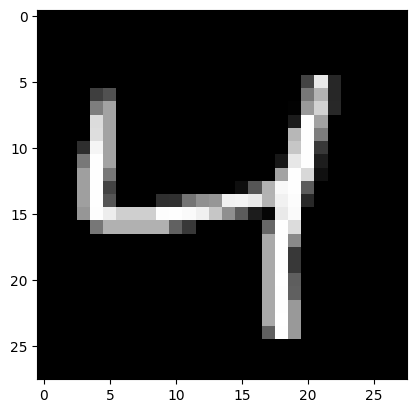

In [3]:
# Display a sample image
import matplotlib.pyplot as plt
plt.imshow(X_train[2], cmap='gray')
plt.show()

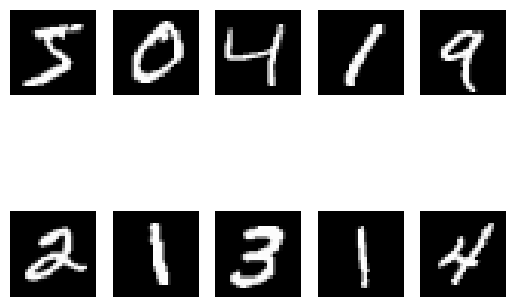

In [4]:
# Display the first 10 images
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(X_train[i], cmap='gray')
  plt.axis('off')

plt.show()

# Data Preprocessing

# Feature Engineering:

  1. Normalization
  2. Reshape the dataset
  3. One Hot Endcoding

In [5]:
# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

# Advantages of Rescaling

  1. Improve the performance of the model.

  2. Rescaling puts all the pixel values on the scale, which can help the model converge faster during training and numerical instability

  3. Normalize the data ensures that all the features have roughly the same scale.

In [6]:
# Reshape input data to be 4D (batch_size, height, width, channels)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test , axis=-1)

# What is the purpose of Reshaping the data?

The purpose of the reshaping the input data to be 4D is to prepare it for consumption by a Convolutional Neural Network (CNN) model. A CNN requires input data to be represented as a 4D tensor with dimensions (batch_size, height_ width, channels)

1. Batch_size: The number of training examples that are processed in one forward/backward pass.

2. height: The height of each input image in pixels.

3. width: The width of each input image in pixels.

4. channels: The number of color channels in each input image (e.g., 1 for grayscale or 3 for RGB)

In [7]:
# Convert labels to one-hot endcoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# What is CNN?

  1. A CNN is a type of neural network commonly used in computer vision tasks such as image classification and object detection.

  2. Unlike traditional neural network, which are fully connected, a CNN uses convolutional layers to learn local features and patterns from the input images.

  3. The convolutional layers in a CNN apply a set of filters to the input image, which extract features such as edges, corners and textures.

  4. A CNN also typically includes pooling layers, which downsample the output of the

  5. Finally, the output of the convolutional and pooling layers is flattened and passed through one or more fully connected layers, which use the learned features to make predictions about the input image


  Overall, CNNs are powerful models for image processing tasks that can automatically learn features from raw input data without the need for hand-crafted features. 

In [8]:
# Define model architecture
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))


In [9]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Train model on training data
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 12s 6ms/step - loss: 0.2760 - accuracy: 0.9244 - val_loss: 0.0836 - val_accuracy: 0.9744
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0758 - accuracy: 0.9770 - val_loss: 0.0562 - val_accuracy: 0.9820
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0555 - accuracy: 0.9832 - val_loss: 0.0470 - val_accuracy: 0.9846
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0455 - accuracy: 0.9858 - val_loss: 0.0453 - val_accuracy: 0.9860
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0385 - accuracy: 0.9881 - val_loss: 0.0400 - val_accuracy: 0.9865
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0328 - accuracy: 0.9898 - val_loss: 0.0386 - val_accuracy: 0.9880
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0284 - accuracy: 0.9914 - val_loss: 0.0410 - val_accuracy: 0.9862
Epoch

# Model accuracy

In [12]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test accruracy: ', test_acc)

Test accruracy:  0.9901000261306763
